# Placement Prediction #

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

dat=pd.read_csv("main1.csv.csv")
print(dat)

    Roll.no  CGPA  tot_arriers  clrd_arriers  Interns  Paid_intrn  Projects  \
0   cseXXXX  8.20            0             0        3           1         5   
1   cseXXXX  7.20            3             3        1           1         1   
2   cseXXXX  2.30           14             2        0           0         0   
3   cseXXXX  6.50            0             0        1           2         3   
4   cseXXXX  9.50            0             0        1           1         1   
5   cseXXXX  7.60            0             0        0           0         0   
6   cseXXXX  6.40            2             1        1           1         0   
7   cseXXXX  9.20            0             0        0           0         0   
8   cseXXXX  7.70            0             0        2           1         3   
9   cseXXXX  8.50            0             0        0           1         1   
10  cseXXXX  3.90            7             2        1           0         1   
11  cseXXXX  7.70            1             0        

In [2]:
iin=dat.iloc[ : , : ]

iin.head()
iin.dtypes

Roll.no          object
CGPA            float64
tot_arriers       int64
clrd_arriers      int64
Interns           int64
Paid_intrn        int64
Projects          int64
Articels          int64
Placement         int64
dtype: object

In [3]:
dat.drop(columns=['Roll.no'])
dat.head()

,Roll.no,CGPA,tot_arriers,clrd_arriers,Interns,Paid_intrn,Projects,Articels,Placement
0,cseXXXX,8.2,0,0,3,1,5,2,1100000
1,cseXXXX,7.2,3,3,1,1,1,0,450000
2,cseXXXX,2.3,14,2,0,0,0,0,0
3,cseXXXX,6.5,0,0,1,2,3,1,350000
4,cseXXXX,9.5,0,0,1,1,1,1,1050000


In [4]:
x=dat.iloc[ : ,1:8]
df = pd.DataFrame(data=x)
df.astype('float64').dtypes
df.head()
df.dtypes

CGPA            float64
tot_arriers       int64
clrd_arriers      int64
Interns           int64
Paid_intrn        int64
Projects          int64
Articels          int64
dtype: object

In [5]:
y=dat.iloc[ : ,8:9]
y.head()


,Placement
0,1100000
1,450000
2,0
3,350000
4,1050000


In [6]:
dat.describe()

,CGPA,tot_arriers,clrd_arriers,Interns,Paid_intrn,Projects,Articels,Placement
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,9.900000e+01
mean,6.593636,2.474747,0.878788,1.050505,0.808081,1.676768,0.757576,4.110000e+05
std,1.996298,3.737137,1.239427,1.172593,0.695125,1.640236,1.040907,3.662950e+05
min,1.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,5.150000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.400000e+05
50%,6.800000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.400000e+05
75%,8.200000,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,5.650000e+05
max,9.800000,17.000000,5.000000,5.000000,2.000000,8.000000,4.000000,1.450000e+06


# Data visualization

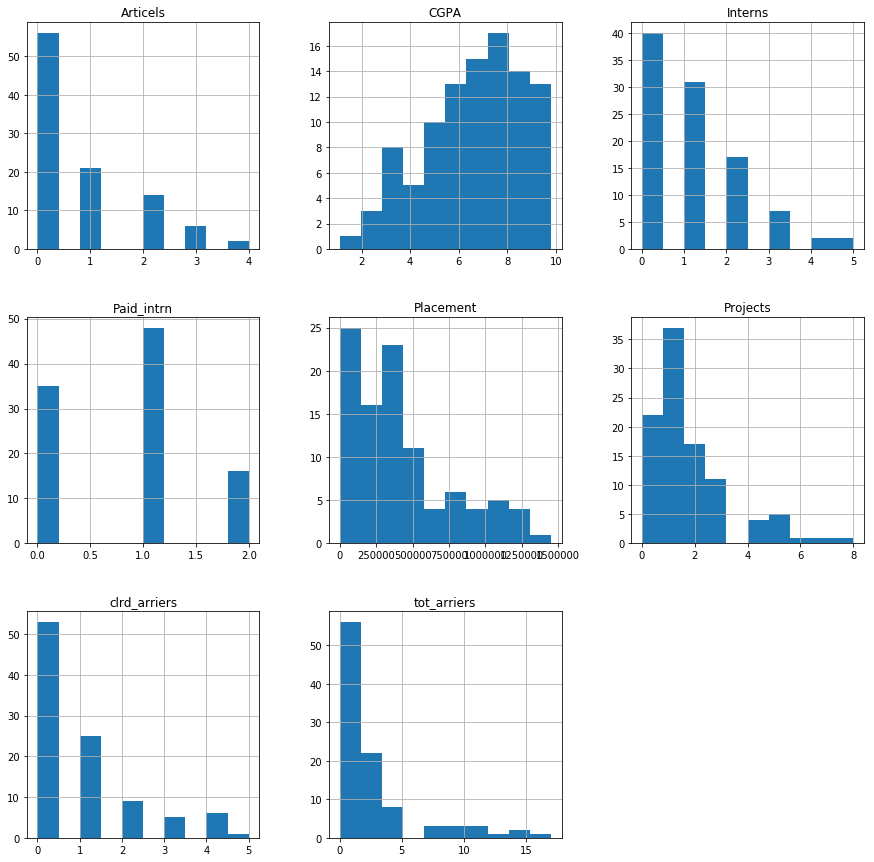

In [7]:
dv= dat.columns[dat.dtypes !='object']
dat[dv].hist(figsize=(15,15))
plt.show()

# Data preprocessing

In [8]:
#Checking for missing values
dat.isnull().sum()

Roll.no         0
CGPA            0
tot_arriers     0
clrd_arriers    0
Interns         0
Paid_intrn      0
Projects        0
Articels        0
Placement       0
dtype: int64

In [9]:
#Drop the missing values
dat.dropna(axis=0,inplace=True)

In [10]:
#Splitting the data
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error


x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.10,random_state=42,shuffle=True)


In [11]:
#Linear Regression 1

In [12]:
from sklearn.linear_model import LinearRegression
my_model = LinearRegression()
my_model.fit(x_train,y_train)
pred=my_model.predict(x_test)
print("Score =",my_model.score(x_test, y_test))



Score = 0.8928611186699242


In [13]:
#Linear Regression 2

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
#Create an object to regressor
lr=LinearRegression()
#fitting the object to training data
lr.fit(x_train,y_train)
#predicting using testing data
y_predict=lr.predict(x_test)
#Calculating the r2_score
r=r2_score(y_test,y_predict)
m=mean_squared_error(y_test,y_predict)
print("r2_score for linear regression model is  ",r)
print("Root mean squared error for linear regression model is ",np.sqrt(m))

r2_score for linear regression model is   0.8928611186699241
Root mean squared error for linear regression model is  138160.38380553105


In [33]:
print(y_test,"\n ",y_predict)

    Placement
62     280000
40          0
95     200000
18     400000
97     300000
84     200000
64     160000
42    1300000
10          0
0     1100000 
  [[ 290038.62488812]
 [  70807.36614716]
 [ 456306.46664074]
 [ 252499.26015427]
 [ 477637.73190397]
 [ 226067.14443968]
 [ 205284.21809214]
 [1323431.24282239]
 [  18610.33790088]
 [ 848726.64624906]]


In [34]:
print(y_predict)

[[ 290038.62488812]
 [  70807.36614716]
 [ 456306.46664074]
 [ 252499.26015427]
 [ 477637.73190397]
 [ 226067.14443968]
 [ 205284.21809214]
 [1323431.24282239]
 [  18610.33790088]
 [ 848726.64624906]]


In [35]:
xp=[[4.1,7,0,0,0,2,0]]

In [36]:
ynew = lr.predict(xp)

In [37]:
print(ynew)

[[169942.7442756]]


In [20]:
#Pllynomial Regression

In [21]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error


x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.10,random_state=42,shuffle=True)

from sklearn.preprocessing import PolynomialFeatures
sample_model = PolynomialFeatures(degree= 4)
y_ = sample_model.fit_transform(y)
y_test_ = sample_model.fit_transform(y_test)
lg = LinearRegression()
lg.fit(y,x)

predicted_data = lg.predict(y_test)
predicted_data1 = np.round_(predicted_data)

print ("Error =",mean_squared_error(x_test,predicted_data1))


Error = 1.9236585714285719


In [22]:
print(y_test)

    Placement
62     280000
40          0
95     200000
18     400000
97     300000
84     200000
64     160000
42    1300000
10          0
0     1100000


In [23]:
print(predicted_data)

[[ 5.97021468  3.28541375  1.12873559  0.79340402  0.73437572  1.26915803
   0.48245195]
 [ 4.63771031  5.01813556  1.66297498  0.24387509  0.57683813  0.3979313
  -0.10559894]
 [ 5.58949915  3.78047713  1.28137542  0.63639575  0.68936498  1.02023611
   0.31443741]
 [ 6.54128798  2.54281869  0.89977585  1.02891641  0.80189183  1.64254091
   0.73447376]
 [ 6.06539356  3.16164791  1.09057564  0.83265608  0.74562841  1.33138851
   0.52445558]
 [ 5.58949915  3.78047713  1.28137542  0.63639575  0.68936498  1.02023611
   0.31443741]
 [ 5.39914138  4.02800881  1.35769533  0.55789162  0.66685961  0.89577515
   0.23043014]
 [10.82433772 -3.02664428 -0.81742218  2.79525939  1.30826265  4.44291253
   2.62463733]
 [ 4.63771031  5.01813556  1.66297498  0.24387509  0.57683813  0.3979313
  -0.10559894]
 [ 9.87254889 -1.78898584 -0.43582262  2.40273873  1.1957358   3.82060773
   2.20460098]]


In [24]:
#Random Forest Regressor

In [26]:
#KNN Neighbours

In [38]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor(n_neighbors=10)
kn.fit(x_train,y_train)
y_pred2=kn.predict(x_test)
r=r2_score(y_test,y_pred2)
m=mean_squared_error(y_test,y_pred2)
print("r2_score for k-neighbors  regression model is  ",r)
print("Root mean squared error for k-neighbors regression model is ",np.sqrt(m))

r2_score for k-neighbors  regression model is   0.9401489638759795
Root mean squared error for k-neighbors regression model is  103263.25580766858


In [39]:
print(y_test)

    Placement
62     280000
40          0
95     200000
18     400000
97     300000
84     200000
64     160000
42    1300000
10          0
0     1100000


In [40]:
print(y_pred2)

[[ 189000.]
 [      0.]
 [ 353000.]
 [ 442000.]
 [ 220000.]
 [ 223000.]
 [ 260000.]
 [1111000.]
 [  48000.]
 [ 965000.]]


In [41]:
xp=[[8.19,0,0,0,1,3,1]]
ynew = kn.predict(xp)
print(ynew)

[[585000.]]


In [292]:
#Desicion Tree

In [293]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(random_state=13)
dt.fit(x_train,y_train)
y_pred1=dt.predict(x_test)
r=r2_score(y_test,y_pred1)
m=mean_squared_error(y_test,y_pred1)
print("r2_score for decision tree regression model is  ",r)
print("Root mean squared error for decision tree regression model is ",np.sqrt(m))

r2_score for decision tree regression model is   0.7266002110415123
Root mean squared error for decision tree regression model is  220703.42090688128


In [294]:
xp1=[[6.2,0,0,1,0,2,1]]
ynew1 = dt.predict(xp1)
print(ynew1)

[300000.]


In [295]:
print(y_test,"    ",y_pred1)

    Placement
62     280000
40          0
95     200000
18     400000
97     300000
84     200000
64     160000
42    1300000
10          0
0     1100000      [ 120000.       0.  570000.  340000.  450000.  120000.  180000. 1290000.
       0.  560000.]


In [296]:
#xgbooost Regressor

In [297]:
from xgboost import XGBRegressor
model=XGBRegressor()
model.fit(x_train,y_train)
y_p=model.predict(x_test)
r=r2_score(y_test,y_p)
m=mean_squared_error(y_test,y_p)
print("r2_score for xgboost regression model is  ",r)
print("Root mean squared error for xgboost regression model is ",np.sqrt(m))

[17:29:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2_score for xgboost regression model is   0.852527134171532
Root mean squared error for xgboost regression model is  162093.6632551167


In [298]:
print(y_test,"      ",y_p)

    Placement
62     280000
40          0
95     200000
18     400000
97     300000
84     200000
64     160000
42    1300000
10          0
0     1100000        [ 168332.7       3378.742   384510.53    339698.94    369165.94
  146111.64    172094.16   1289736.2       7256.6787  647683.7   ]


In [299]:
# Gradient Boost regressor

In [300]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')
clf.fit(x_train, y_train)

print("Score =",clf.score(x_test,y_test))
pred=clf.predict(x_test)
m=mean_squared_error(y_test,pred)
print("Root mean squared error for xgboost regression model is ",np.sqrt(m))

Score = 0.8576100960524331
Root mean squared error for xgboost regression model is  159275.71957744946


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [301]:
xp=[[6.2,0,0,1,0,2,1]]
ynew = clf.predict(xp)
print(ynew)

[333772.39678897]


In [302]:
print(y_test,"   ",pred)

    Placement
62     280000
40          0
95     200000
18     400000
97     300000
84     200000
64     160000
42    1300000
10          0
0     1100000     [ 1.57183086e+05 -1.11521568e+02  3.58321336e+05  3.87246887e+05
  3.79502725e+05  1.18649383e+05  1.77517678e+05  1.28431523e+06
  2.98384277e+02  6.52916475e+05]


In [303]:
#lgbm Regressor

In [304]:
from lightgbm import LGBMRegressor
lgbm=LGBMRegressor(random_state=45)
lgbm.fit(x_train,y_train)
y_predict1=lgbm.predict(x_test)
r=r2_score(y_test,y_predict1)
m=mean_squared_error(y_test,y_predict1)
print("r2_score for LGBM regression model is  ",r)
print("Root mean squared error for LGBM regression model is ",np.sqrt(m))

r2_score for LGBM regression model is   0.8674666873045027
Root mean squared error for LGBM regression model is  153664.1308929334


In [305]:
xp=[[6.2,0,0,1,0,2,1]]
ynew = lgbm.predict(xp)
print(ynew)

[322453.48515901]


In [306]:
print(y_test,"      ",y_predict1)

    Placement
62     280000
40          0
95     200000
18     400000
97     300000
84     200000
64     160000
42    1300000
10          0
0     1100000        [ 168501.00379309   41177.93070001  322692.12114052  295764.82518904
  317271.03339603  128255.09632459  150258.55508792 1045256.65304041
   24626.56194566  746390.72562966]


In [307]:
from sklearn import ensemble, model_selection 
RFC = ensemble.RandomForestClassifier( n_estimators = 100,max_depth = 8, min_samples_split = 4, n_jobs = -1, random_state = 1 )

#fitting in to dataset
RFC = RFC.fit(x_train, y_train)
#Score of the train dataset



y_predict1=RFC.predict(x_test)
r=r2_score(y_test,y_predict1)
m=mean_squared_error(y_test,y_predict1)
print("r2_score for LGBM regression model is  ",r)
print("Root mean squared error for LGBM regression model is ",np.sqrt(m))

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


r2_score for LGBM regression model is   0.8641139624166498
Root mean squared error for LGBM regression model is  155595.62975867928


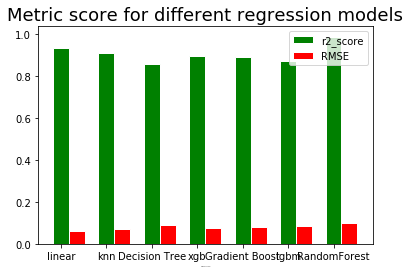

In [314]:
regressionmodels=['linear','knn','Decision Tree','xgb','Gradient Boost','lgbm','RandomForest']
errors=['r2_score','RMSE']
index = np.arange(len(regressionmodels))
bar_width=0.35
r=[0.9308,0.9104,0.85582,0.8967,0.8919,0.8718,0.987]
m=[0.0624,0.07098,0.09005,0.07622,0.07796,0.08492,0.09876]
plt.bar(index,r,bar_width,color='green',edgecolor='white')
plt.bar(index+bar_width,m,bar_width,color='red',edgecolor='white')
plt.xticks(index, regressionmodels)
plt.xlabel('regression models', fontsize=1)

plt.title('Metric score for different regression models',fontsize=18)
plt.legend(errors)
plt.show()

In [ ]:
#So here the best model is linear Regression 